# Лабораторная работа №3

## Введение

Цель работы: изучение методов классификации данных, реализованные в библиотеке Scikit-Learn, а также ознакомление с нейронными сетями с использованием библиотек TensorFlow и TensorBoard. 

Постановка задачи:

1. Необходимо выбрать и подготовить датасет для классификации, затем построить классификационные модели с помощью пяти методов:
    - Наивный Байесовский классификатор (GaussianNB, MultinomialNB, ComplementNB, BernoulliNB);
    - Деревья решений (Decision Tree);
    - Линейный дискриминантный анализ (Linear Discriminant Analysis);
    - Метод опорных векторов (Support Vector Machines);
    - Метод ближайших соседей (k-Nearest Neighbors);

2. Затем сравните качество работы классификаторов с помощью следующих метрик:
    - Accuracy (точность),
    - Precision (доля правильно классифицированных положительных примеров),
    - Recall (чувствительность, доля верно найденных положительных примеров),
    - F1-Score (среднее гармоническое precision и recall),
    - Площадь под кривой ROC (AUC-ROC).

3. Настройте гиперпараметры каждого метода и проведите исследование влияния различных параметров на качество классификации.

4. Реализуйте и протестируйте нейронную сеть на TensorFlow, исследуйте эффект настройки гиперпараметров и визуализируйте процесс обучения с помощью инструмента TensorBoard.

## Выбор и подготовка датасета

В качестве датасета мы выбрали «Breast Cancer Wisconsin (Diagnostic)» («Рак молочной железы в Висконсине (диагностика)»). Признаки вычисляются на основе оцифрованного изображения тонкоигольной аспирационной биопсии (FNA) опухоли молочной железы. Они описывают характеристики ядер клеток, присутствующих на изображении.

Классифицируются данные по диагнозу – опухоль может быть доброкачественной (Benign – B) и злокачественной (Malignant – M).

Для каждого клеточного ядра вычисляются десять действительных характеристик:
- radius – расстояние от центра до точек контура (среднее)
- texture – стандартное отклонение уровней серого
- perimeter – периметр
- area – площадь
- smoothness – локальные колебания радиуса (гладкость)
- compactness – компактность, обычно (perimeter^2)/area-1.0
- concavity – степень вогнутости (насколько контур имеет вогнутые части)
- concave points – количество вогнутых сегментов контура
- symmetry – симметрия 
- fractal dimension – фрактальная размерность

Среднее значение, стандартная ошибка и «наихудшее» (то есть наибольшее – среднее из трёх самых больших значений) были вычислены для каждого признака на изображении, в результате чего получилось 30 признаков.

Например, поле 3 соответствует среднему радиусу (Mean Radius), поле 13 – стандартной ошибке радиуса (Radius SE), а поле 23 – наибольшему радиусу (Worst Radius).

Загрузим данные:


In [155]:
import pandas as pd

file_path = "data.csv"
df = pd.read_csv(file_path)

df = df.drop(columns=['Unnamed: 32', 'id'])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Проведем дескриптивный анализ:

In [156]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Дескриптивный анализ данных показывает основные статистические характеристики признаков, описывающих клеточные свойства опухолей молочной железы. Всего в наборе данных содержится 569 наблюдений, и для каждого образца вычислены 30 количественных признаков, полученных при микроскопическом исследовании. Пропусков в данных нет, о чём свидетельствует одинаковое количество значений для всех переменных (count = 569).

Средние значения признаков показывают общую тенденцию распределения данных. Так, средний радиус ядра клетки (radius_mean) составляет около 14,13, а площадь (area_mean) – примерно 654,89. При этом стандартное отклонение довольно велико (std для площади более 350), что говорит о сильной вариативности размеров клеток в различных образцах. Параметры, связанные с формой клеток, такие как гладкость (smoothness_mean = 0,096), компактность (compactness_mean = 0,104) и вогнутость границ (concavity_mean = 0,089), имеют меньшие значения, однако разброс этих показателей указывает на значительные различия между доброкачественными и злокачественными опухолями.

Признаки, характеризующие симметрию и фрактальную размерность формы (symmetry_mean = 0,18 и fractal_dimension_mean = 0,063), имеют относительно низкие значения, что отражает умеренную асимметрию клеточных структур. Аналогичные показатели, рассчитанные для «наихудших» измерений (worst), имеют более высокие средние значения. Например, radius_worst равен 16,27, а area_worst – 880,58. Это объясняется тем, что данные параметры отражают наиболее выраженные патологические отклонения клеток.

Большой разброс значений, особенно для признаков, связанных с размером и формой клеток, подтверждает, что в данных присутствуют как доброкачественные, так и злокачественные случаи. Признаки, описывающие «наихудшие» характеристики клеток, оказываются наиболее информативными для различения типов опухолей.

Построим гистограммы распределений:


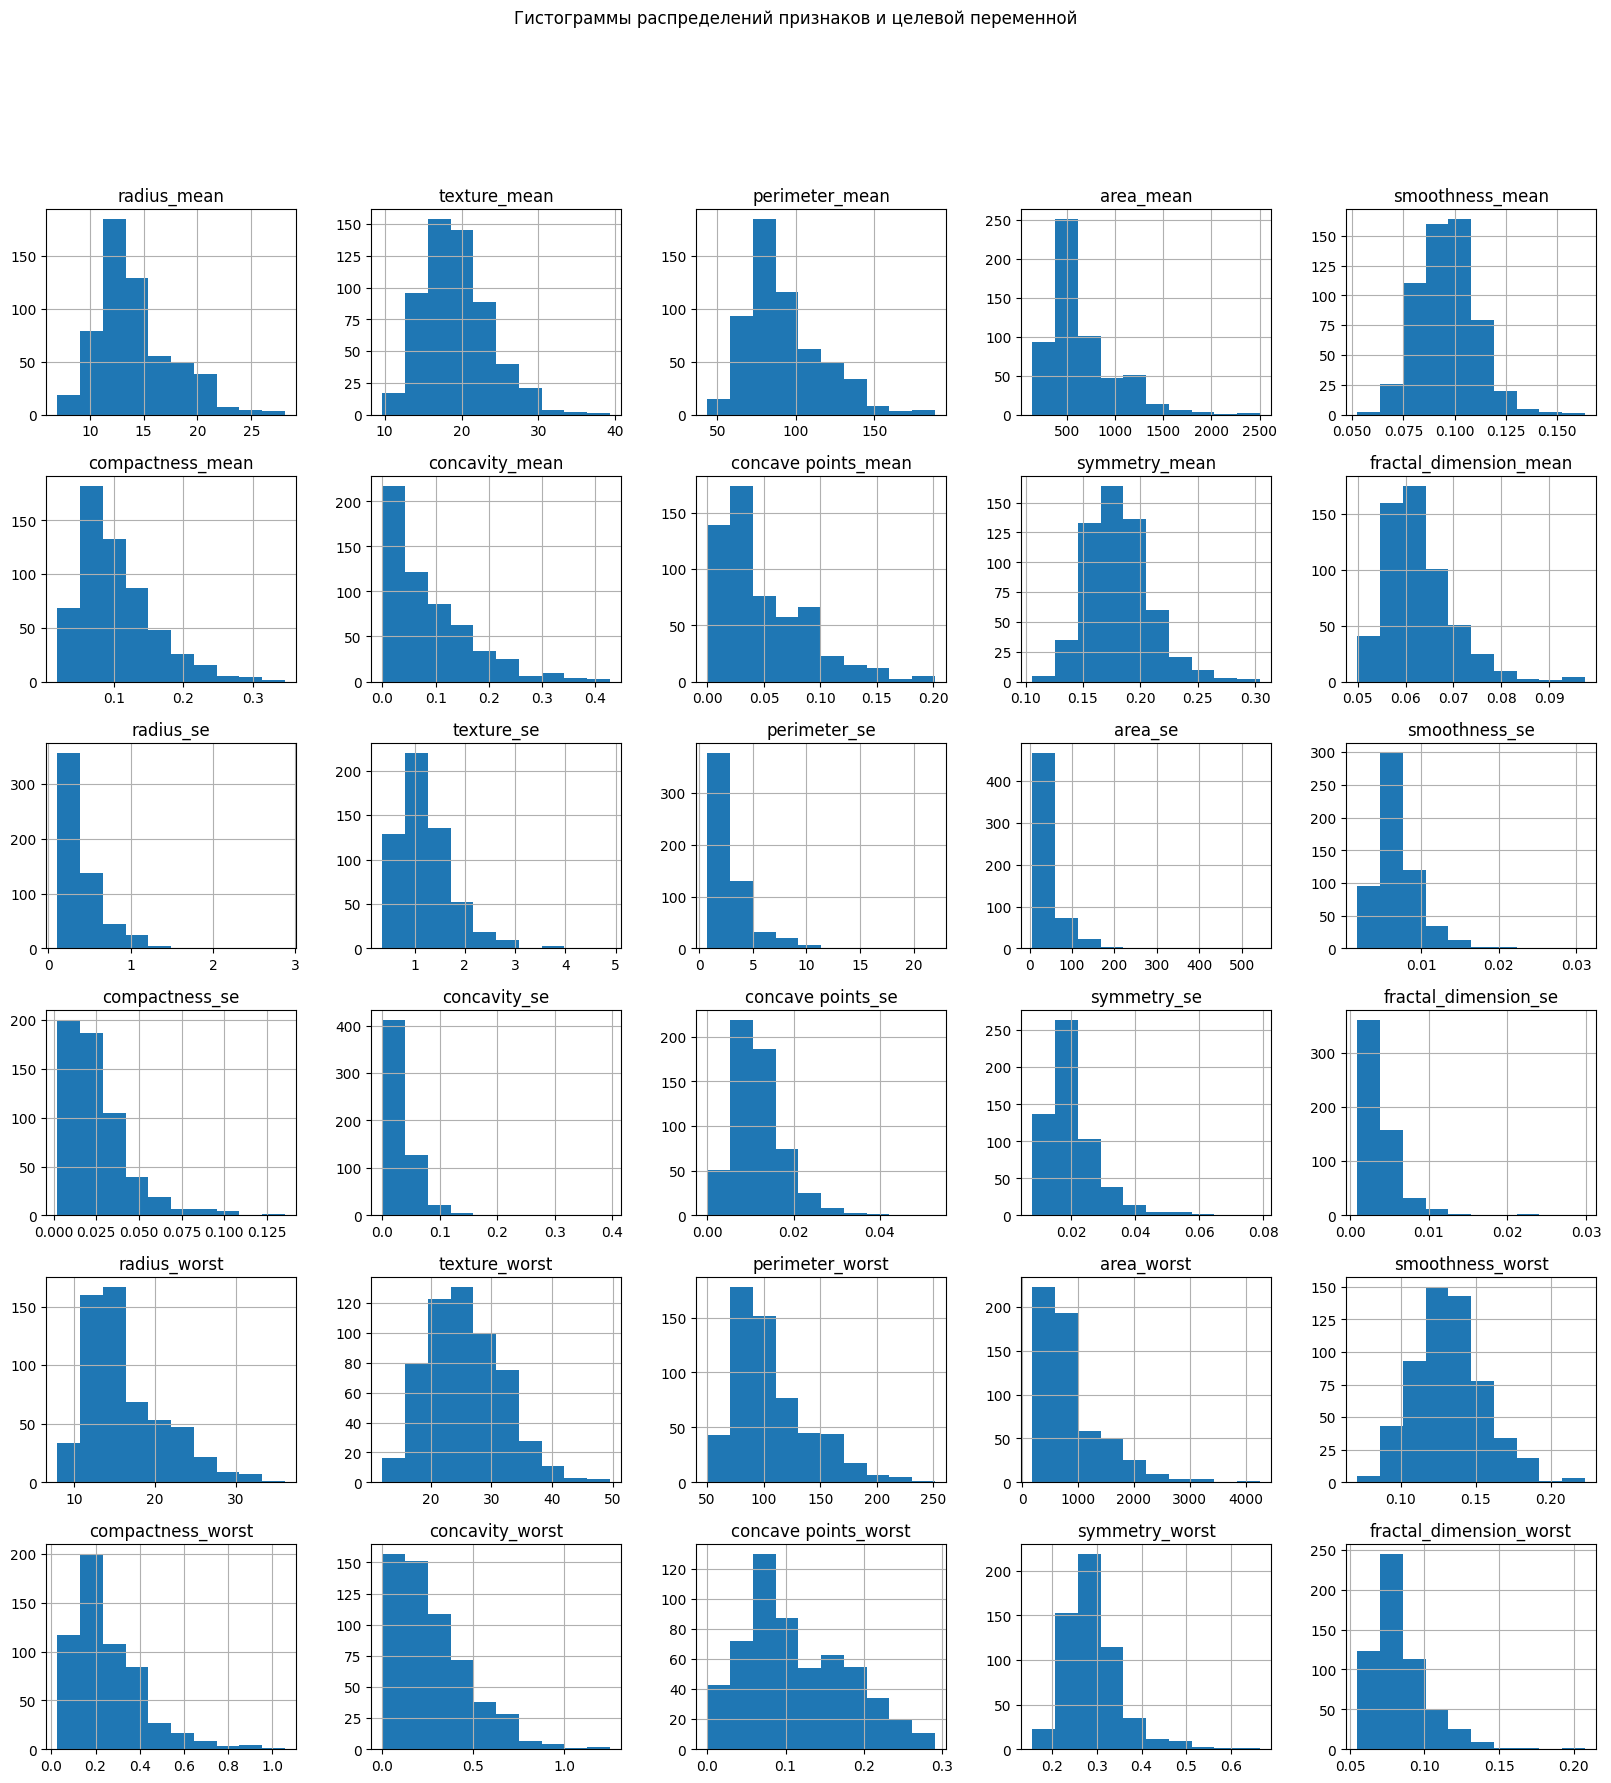

In [157]:
import matplotlib.pyplot as plt

df.hist(bins=10, figsize=(20, 20))
plt.suptitle("Гистограммы распределений признаков и целевой переменной")
plt.show()


По приведённым гистограммам видно, что большинство признаков в наборе данных Breast Cancer Wisconsin Diagnostic не подчиняются нормальному (гауссовскому) распределению. Распределения значений асимметричны, чаще всего со сдвигом вправо (положительная асимметрия), что означает, что для многих признаков преобладают относительно небольшие значения, а большие встречаются значительно реже.

Показатели, такие как radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, concave_points_mean, демонстрируют экспоненциальный или логнормальный характер распределения, при котором большая часть наблюдений сосредоточена в нижней части диапазона. Это характерно для медицинских данных, где большинство опухолей имеют умеренные характеристики, а экстремальные значения соответствуют злокачественным случаям.

Некоторые признаки, например texture_mean и symmetry_mean, ближе к симметричному распределению, хотя и не являются строго нормальными. Для признаков типа fractal_dimension_mean или smoothness_mean значения распределены в узком диапазоне и также имеют небольшой сдвиг вправо.
Таким образом, выборка не соответствует нормальному распределению, что подтверждает необходимость использования методов нормализации или стандартизации данных перед обучением моделей машинного обучения (например, масштабирования с помощью StandardScaler или MinMaxScaler). 

Приведем целевую функцию к бинарному виду:

In [158]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

map_diagnosis = {'M':1, 'B':0}

df['diagnosis'] = df['diagnosis'].map(map_diagnosis)

df['diagnosis'].head


<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64>

Для подготовки данных к обучению модели мы преобразовали категориальный признак diagnosis, содержащий строковые значения M и B, в числовой формат. Значению M было присвоено значение 1, а B - значение 0. Это позволило использовать данный признак в алгоритмах машинного обучения, которые требуют числового представления входных данных.

## Разбиение выборки

Разобьем выборку на обучающий (80%) и тестовый (20%) наборы:

In [159]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
# scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




Так же мы стандартизировали данные. Далее, для удобства пропишем отдельную функцию для построения моделей, чтобы избавиться от повторения кода и сохранять метрики каждого классификатора в словарь:

In [160]:
metrics_dict = {'Model': [], 'Accuracy': [], 'Recall': [], 'Precision': [], 'F1': [], 'ROC_AUC': []}


def build_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['B', 'M'])
    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(ax=ax, cmap='Blues', colorbar=True)
    ax.set_title('Confusion Matrix')
    plt.tight_layout()
    plt.show()
    print(cm)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Accuracy: ", accuracy)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("F1: ", f1)
    print("ROC-AUC: ", roc_auc)
    
    if model_name == "DecisionTree":
        plt.figure(figsize=(24, 12))
        plot_tree(
            model,
            filled=True,
            feature_names=X.columns,
            class_names=['Malignant', 'Benign'],
            fontsize=10
        )
        plt.show()
        
    metrics_dict['Model'].append(model_name)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Recall'].append(recall)
    metrics_dict['Precision'].append(precision)
    metrics_dict['F1'].append(f1)
    metrics_dict['ROC_AUC'].append(roc_auc)
    

Эта функция обучает переданную модель на тренировочных данных и проверяет её качество на тестовых. После обучения она получает предсказания, сравнивает их с реальными метками, строит матрицу ошибок и выводит её на экран. На основе результатов вычисляются основные метрики качества: точность, полнота, точность предсказаний положительного класса, F1-мера и площадь под ROC-кривой. Значения метрик сохраняются в общей таблице metrics_dict, чтобы позже можно было сравнить разные модели. Если используется модель дерева решений, дополнительно отображается схема дерева в графическом виде.

## Методы классификации

### Наивный Байесовский классификатор

Наивный байесовский классификатор - это вероятностный метод машинного обучения, основанный на теореме Байеса. Он оценивает вероятность того, что объект принадлежит определённому классу, используя значения его признаков. Алгоритм называется «наивным», потому что делает упрощающее предположение: каждый признак влияет на результат независимо от других, даже если в реальности признаки могут быть связаны.

Несмотря на это упрощение, метод часто показывает высокую точность и хорошо работает на реальных данных. Он особенно эффективен при большом количестве признаков и требует небольшого объёма данных для обучения. Модель вычисляет вероятность класса для наблюдения и выбирает тот класс, у которого эта вероятность максимальна.

Наивный Байес широко используется в текстовой классификации, фильтрации спама и других задачах, где важно быстро и надёжно определить принадлежность объекта к одному из классов.

Для решения задачи классификации я выбрала гауссовский наивный байесовский классификатор (GaussianNB), потому что этот алгоритм хорошо подходит для данных, где признаки имеют примерно нормальное распределение, как в используемом датасете. GaussianNB прост в реализации, быстро обучается и не требует большого числа наблюдений. Он позволяет эффективно обрабатывать многомерные числовые признаки и часто показывает хорошие результаты даже при наличии слабых зависимостей между ними. Поэтому этот метод является удачным базовым выбором для сравнения с другими моделями классификации.

Построим модель со значениями по умолчанию: priors=None (априорные вероятности классов), var_smoothing=1e-9 (часть наибольшей дисперсии всех признаков, которая добавляется к дисперсиям для обеспечения стабильности расчетов).

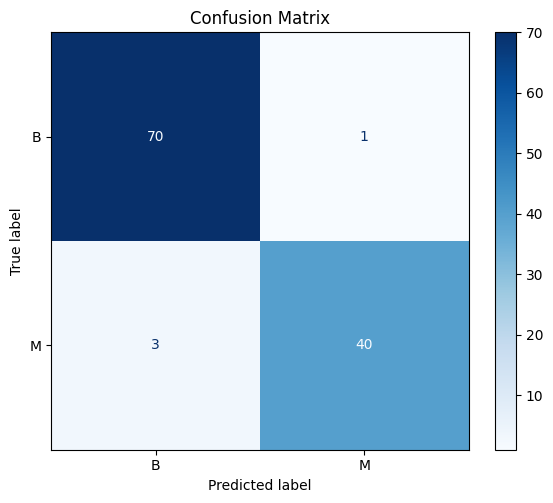

[[70  1]
 [ 3 40]]
Accuracy:  0.9649122807017544
Recall:  0.9302325581395349
Precision:  0.975609756097561
F1:  0.9523809523809523
ROC-AUC:  0.9580740255486406


In [161]:
model_gaussianNB = GaussianNB()
build_model(model_gaussianNB, "GaussianNB")

Модель правильно классифицировала большинство объектов. Ошибки наблюдаются в небольшом числе случаев: один доброкачественный объект был классифицирован как злокачественный, и три злокачественных объекта определены как доброкачественные. Общая точность высокая, что говорит о хорошей способности модели различать классы.

### Дерево решений

Дерево решений - это классификатор, который строится на основе правил вида «если–то» и имеет древовидную структуру. Множество объектов последовательно делится на подмножества по значению признаков, пока в листьях не останутся объекты одного класса. Узлы содержат условия разбиения, листья - метки классов. Корневой узел содержит весь обучающий набор данных.

Алгоритм работает жадно: на каждом шаге выбирается разбиение, максимально разделяющее классы. Деревья могут быть бинарными (два потомка) или полихотомичными (несколько потомков). Слишком глубокое дерево может привести к переобучению, поэтому на практике применяются ограничения на глубину и отсечение ветвей.

Построим модель с параметрами по умолчанию: criterion=gini (измерения качества разделения), splitter=best (cтратегия, используемая для выбора разделения в каждом узле), max_depth=None (максимальная глубина дерева).

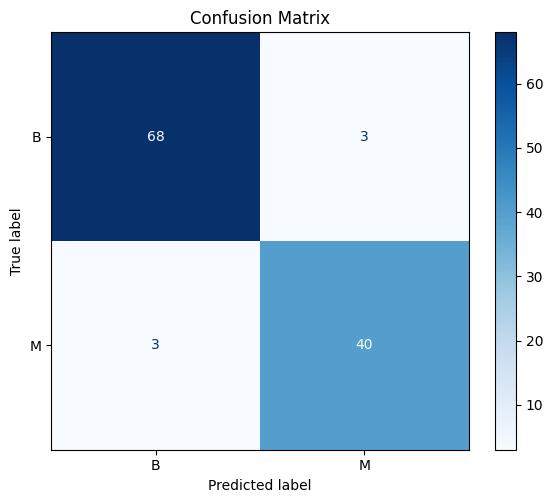

[[68  3]
 [ 3 40]]
Accuracy:  0.9473684210526315
Recall:  0.9302325581395349
Precision:  0.9302325581395349
F1:  0.9302325581395349
ROC-AUC:  0.9439895185063871


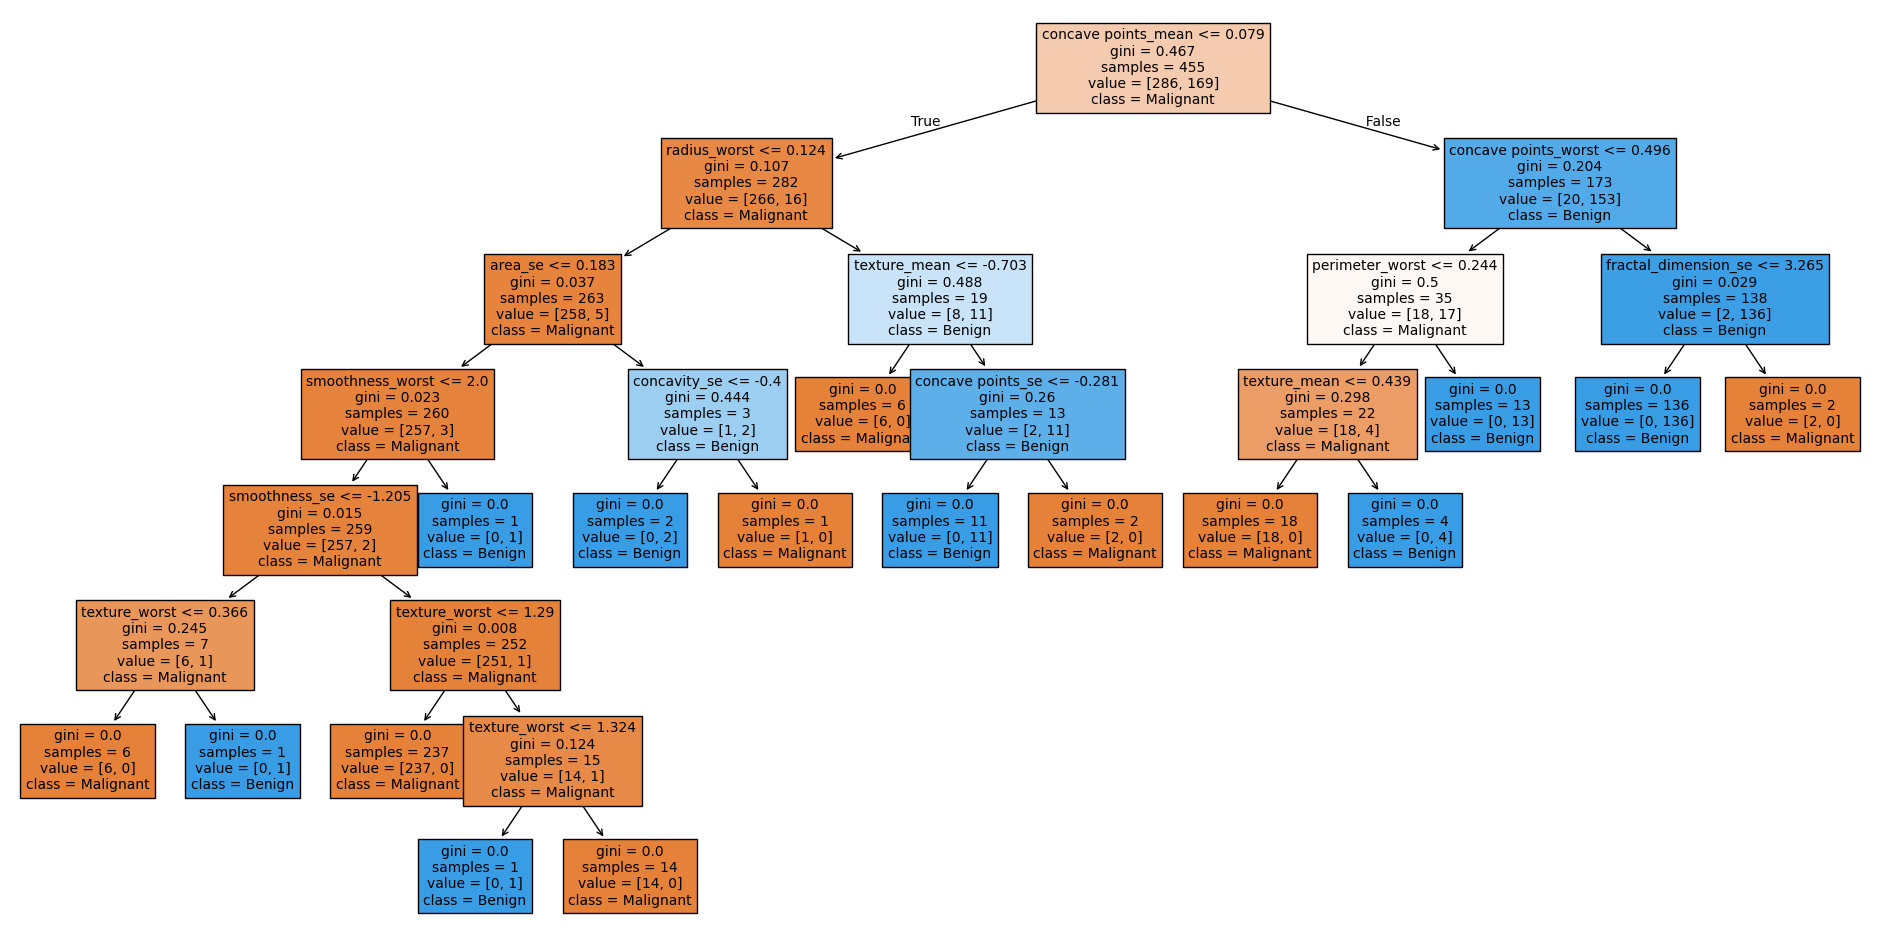

In [162]:
model_tree = DecisionTreeClassifier(random_state=42)
build_model(model_tree, "DecisionTree")


Результаты работы дерева решений показывают высокую точность классификации. Модель правильно определила большинство случаев здоровых и больных клеток, допустив лишь незначительное количество ошибок. Общая точность классификации составила 93,86%, что свидетельствует о высокой эффективности построенного дерева решений для данной задачи. Однако результат хуже, чем у наивного байевского классификатора.

### Линейный дискриминантный анализ

Линейный дискриминантный анализ (ЛДА), также называемый линейным дискриминантом Фишера, представляет собой метод для поиска линейных комбинаций признаков, которые максимально разделяют два или более классов объектов. Полученные комбинации можно использовать для классификации или сокращения размерности данных перед применением других методов. Суть ЛДА заключается в выявлении признаков и построении функций, позволяющих различать группы объектов, а также в прогнозировании принадлежности новых наблюдений к классам на основе их признаков. Геометрически метод строит гиперповерхности, разделяющие пространства признаков, так чтобы центроиды групп были максимально удалены друг от друга. ЛДА прост в реализации и интерпретации, но чувствителен к распределению данных. Метод активно применяется для классификации, распознавания образов и уменьшения размерности.

Построим модель с параметрами по умолчанию: solver=svd (решатель), shrinkage=None (регуляризация ковариационной матрицы).

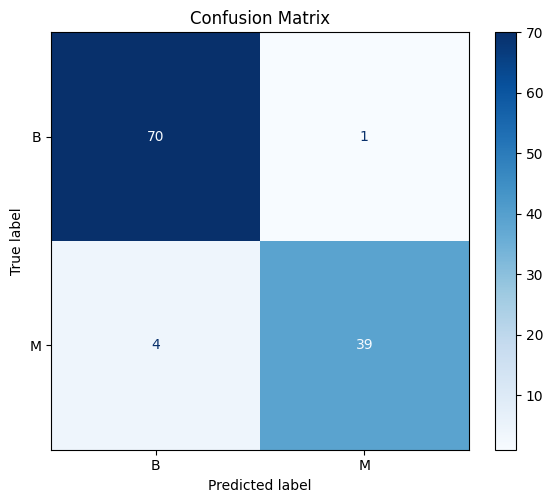

[[70  1]
 [ 4 39]]
Accuracy:  0.956140350877193
Recall:  0.9069767441860465
Precision:  0.975
F1:  0.9397590361445783
ROC-AUC:  0.9464461185718964


In [163]:
model_lda = LinearDiscriminantAnalysis()
build_model(model_lda, "LDA")

Результаты линейного дискриминантного анализа показывают высокую точность классификации на данном датасете. Модель правильно определила большинство случаев здоровых и больных образцов, допустив лишь небольшое количество ошибок. Общая точность составила 95,61%, что свидетельствует о высокой эффективности ЛДА для разделения классов. Модель демонстрирует хорошую способность выявлять больные образцы, одновременно минимизируя ошибки классификации здоровых наблюдений.Результаты линейного дискриминантного анализа на датасете «Breast Cancer Wisconsin (Diagnostic)» показывают высокую эффективность классификации. Модель правильно определила большинство здоровых и больных образцов, допустив всего одну ошибку при предсказании здорового образца как больного и четыре ошибки при классификации больного как здорового. Общая точность составила 95,6%, что подтверждает надежность модели.

Метрики для положительного класса (Malignant) показывают, что модель хорошо справляется с выявлением больных образцов: полнота (recall) составляет 90,7%, точность (precision) - 97,5%, а F1-мера - 93,98%, что отражает сбалансированность между точностью и полнотой предсказаний. ROC-AUC равен 0,946, указывая на высокую способность модели различать классы при любом пороговом значении.

Таким образом, линейный дискриминантный анализ демонстрирует высокую эффективность в диагностике рака молочной железы, одновременно минимизируя ошибки как ложноположительных, так и ложноотрицательных предсказаний. Модель подходит для задач, где важно точно выявлять больные образцы, не жертвуя при этом корректностью распознавания здоровых.

### Метод опорных векторов

Это алгоритм бинарной классификации с обучением с учителем, использующие гиперплоскость для разделения классов. Основная идея метода заключается в отображении объектов в пространство большей размерности, где их линейное разделение становится более вероятным. В этом пространстве строится разделяющая гиперплоскость, а по обе стороны от неё на равном расстоянии - вспомогательные гиперплоскости, между которыми формируется зазор. Алгоритм выбирает гиперплоскость так, чтобы этот зазор был максимально широким, обеспечивая уверенное разделение классов и минимизацию ошибок. Объекты, лежащие на границах зазора, называются опорными векторами, что и определяет название метода.

Также построим модель с параметрами по умолчанию: C=1.0 (параметр регуляризации, определяющий баланс между максимизацией зазора и минимизацией ошибок классификации), kernel=rbf (ядро, используемое для отображения данных в пространство большей размерности), gamma=scale (параметр, определяющий влияние отдельных обучающих примеров). 

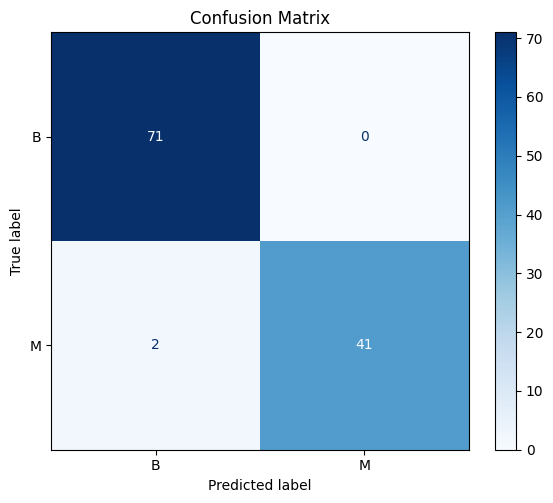

[[71  0]
 [ 2 41]]
Accuracy:  0.9824561403508771
Recall:  0.9534883720930233
Precision:  1.0
F1:  0.9761904761904762
ROC-AUC:  0.9767441860465116


In [164]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model_svc = SVC(random_state=42)
build_model(model_svc, "SVC")




Результаты классификации с использованием метода опорных векторов демонстрируют высокую эффективность на данном датасете. Модель правильно определила почти все здоровые и больные образцы, допуская лишь две ошибки при классификации больных объектов и ни одной при классификации здоровых. Общая точность составила 98,25%, что свидетельствует о надежности модели.

Метрики для положительного класса (Malignant) показывают, что модель идеально определяет больные образцы с точностью 100%, а полнота составляет 95,3%, что отражает способность выявлять почти все больные случаи. F1-мера равна 97,6%, а ROC-AUC - 0,977, что подтверждает высокую способность модели различать классы.

Таким образом, метод опорных векторов показал наилучшие результаты среди рассмотренных моделей, эффективно разделяя классы и минимизируя ошибки как ложноположительных, так и ложноотрицательных предсказаний.

### Метод ближайших соседей

Метод k-ближайших соседей (KNN) - это непараметрический алгоритм классификации, который относит объект к классу, к которому принадлежат большинство его ближайших соседей в пространстве признаков. Алгоритм хранит обучающие примеры и при классификации нового объекта выбирает k ближайших по метрике расстояния соседей, после чего определяет класс с помощью голосования, простого или взвешенного по удалённости. KNN не требует предположений о распределении данных, легко интерпретируется и подходит для задач с разными типами признаков, однако вычислительно затратен при больших объёмах данных и чувствителен к выбору параметра k и дисбалансу классов.

Построим модель с параметрами по умолчанию: n_neighbor=5 (число соседей), weights=uniform (способ взвешивания голосов соседей), algorithm=auto (алгоритм поиска ближайших соседей).

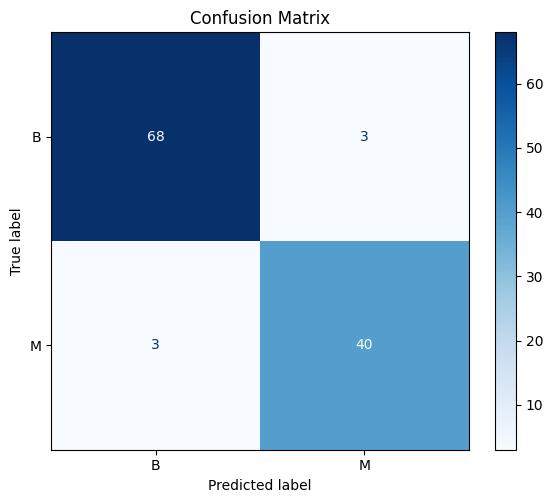

[[68  3]
 [ 3 40]]
Accuracy:  0.9473684210526315
Recall:  0.9302325581395349
Precision:  0.9302325581395349
F1:  0.9302325581395349
ROC-AUC:  0.9439895185063871


In [165]:
model_kneighbors = KNeighborsClassifier()
build_model(model_kneighbors, "KNeighbors")

Результаты классификации с использованием метода k-ближайших соседей показывают высокую точность на данном датасете. Модель корректно определила большинство здоровых и больных образцов, допустив три ошибки при классификации здоровых объектов и три ошибки при классификации больных. Общая точность составила 94,7%, что свидетельствует о надежности метода.

Метрики для положительного класса (Malignant) показывают, что модель хорошо выявляет больные образцы: полнота и точность равны примерно 93%, F1-мера также составляет 93%, а ROC-AUC равен 0,944, что подтверждает способность метода различать классы.

Таким образом, KNN демонстрирует эффективное разделение классов, сочетая высокую точность с понятной логикой работы, что делает его подходящим для задач диагностики и других областей, где важно учитывать локальное сходство объектов.

## Настройка гиперпараметров

### Наивный байесовский классификатор

В этом эксперименте с наивным байесовским классификатором GaussianNB изменяется параметр var_smoothing, который добавляет небольшое значение к дисперсии признаков для повышения устойчивости модели к шуму и предотвращения деления на ноль. Мы тестируем значения var_smoothing от 0 до 5, чтобы оценить, как это влияет на точность классификации.

In [166]:
smoothing = [0, 1, 2, 3, 4, 5]
for sm in smoothing:
    print("var_smoothing  =", sm)
    model = GaussianNB(var_smoothing=sm)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))

var_smoothing  = 0
[[70  1]
 [ 3 40]]
Accuracy:  0.9649122807017544
var_smoothing  = 1
[[71  0]
 [ 7 36]]
Accuracy:  0.9385964912280702
var_smoothing  = 2
[[71  0]
 [11 32]]
Accuracy:  0.9035087719298246
var_smoothing  = 3
[[71  0]
 [13 30]]
Accuracy:  0.8859649122807017
var_smoothing  = 4
[[71  0]
 [14 29]]
Accuracy:  0.8771929824561403
var_smoothing  = 5
[[71  0]
 [15 28]]
Accuracy:  0.868421052631579


Результаты показывают, что при var_smoothing = 0 модель достигает наибольшей точности - 96,5%, корректно классифицируя почти все образцы с минимальным количеством ошибок. При увеличении var_smoothing точность постепенно снижается: с ростом параметра увеличивается число ошибок для больных образцов, в то время как количество корректно определённых здоровых остаётся стабильным. Например, при var_smoothing = 1 точность падает до 93,9%, а при var_smoothing = 5 - до 86,8%.

Таким образом, для данного датасета оптимальным оказалось минимальное сглаживание (var_smoothing = 0), так как оно обеспечивает наибольшую точность. Более высокие значения параметра приводят к чрезмерной регуляризации, из-за чего модель хуже распознаёт положительные (Malignant) случаи.

### Дерево решений

Мы будем менять два параметра дерева решений. Первый параметр - criterion, определяющий функцию разбиения узлов, с вариантами 'gini' (коэффициент Джини) и 'entropy' (информационная энтропия). Второй параметр - max_depth, максимальная глубина дерева, принимающая значения от 1 до 4, которая контролирует сложность модели и баланс между недообучением и переобучением.

In [167]:
criterion = ['entropy', 'gini']

for cr in criterion:
    for i in range (1,5):
        model = DecisionTreeClassifier(
            criterion=cr, 
            max_depth=i, 
            random_state=42
        )
        print(f"criterion: {cr}, max_depth = {i}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(confusion_matrix(y_test, y_pred))
        print("Accuracy: ", accuracy_score(y_test, y_pred))

criterion: entropy, max_depth = 1
[[63  8]
 [ 4 39]]
Accuracy:  0.8947368421052632
criterion: entropy, max_depth = 2
[[63  8]
 [ 2 41]]
Accuracy:  0.9122807017543859
criterion: entropy, max_depth = 3
[[71  0]
 [ 4 39]]
Accuracy:  0.9649122807017544
criterion: entropy, max_depth = 4
[[70  1]
 [ 5 38]]
Accuracy:  0.9473684210526315
criterion: gini, max_depth = 1
[[63  8]
 [ 4 39]]
Accuracy:  0.8947368421052632
criterion: gini, max_depth = 2
[[69  2]
 [ 6 37]]
Accuracy:  0.9298245614035088
criterion: gini, max_depth = 3
[[69  2]
 [ 4 39]]
Accuracy:  0.9473684210526315
criterion: gini, max_depth = 4
[[68  3]
 [ 3 40]]
Accuracy:  0.9473684210526315


Результаты показывают, что при малой глубине (max_depth=1) дерево недообучено, точность составляет около 89,5%, и наблюдаются ошибки среди как здоровых, так и больных образцов. Увеличение глубины до 2–3 улучшает классификацию: при criterion='entropy' и max_depth=3 точность достигает максимума 96,5%, модель корректно разделяет почти все объекты. Глубина 4 приводит к небольшому снижению точности до 94,7%, вероятно, из-за переобучения.
Сравнение критериев разбиения показывает, что оба метода (gini и entropy) дают близкие результаты при одинаковой глубине, но оптимальная комбинация для данного датасета - criterion='entropy' и max_depth=3, обеспечивающая наибольшую точность и минимальное число ошибок при классификации как здоровых, так и больных образцов.

### Линейный дискриминантный анализ

Мы будем менять два основных параметра, которые напрямую влияют на способ построения классификационной модели и устойчивость её предсказаний.

Первый параметр - solver, определяющий метод решения задачи дискриминантного анализа. Доступны три варианта:
- 'svd' - метод сингулярного разложения, который не требует оценки ковариационной матрицы и устойчив к плохо обусловленным данным, но не поддерживает регуляризацию (shrinkage).
- 'lsqr' - метод наименьших квадратов, который позволяет использовать регуляризацию для улучшения стабильности модели при малых выборках или высокой коррелированности признаков.
- 'eigen' - метод собственных значений, который также может работать с регуляризацией и полезен для задач с высокой размерностью признаков.

Второй параметр - shrinkage, регулирующий тип регуляризации ковариационной матрицы для повышения устойчивости модели. Возможные значения:
- None - регуляризация не применяется.
- 'auto' - автоматически выбирается оптимальное значение коэффициента регуляризации.

числовое значение (например, 0.5) - фиксированная степень регуляризации, которая смешивает оценку ковариационной матрицы с единичной матрицей для уменьшения влияния шумов и корреляций между признаками.

Для solver='svd' параметр shrinkage не используется, поэтому все комбинации с этим параметром игнорируются.

In [168]:
solvers = ['svd', 'lsqr', 'eigen']
shrinkages = [None, 'auto', 0.5] 

for s in solvers:
    for sh in shrinkages:
        if s == 'svd' and sh is not None:
            continue
        model = LinearDiscriminantAnalysis(solver=s, shrinkage=sh)
        print(f"solver: {s}, shrinkage={sh}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(confusion_matrix(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print()

solver: svd, shrinkage=None
[[70  1]
 [ 4 39]]
Accuracy: 0.956140350877193

solver: lsqr, shrinkage=None
[[70  1]
 [ 4 39]]
Accuracy: 0.956140350877193

solver: lsqr, shrinkage=auto
[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544

solver: lsqr, shrinkage=0.5
[[71  0]
 [ 4 39]]
Accuracy: 0.9649122807017544

solver: eigen, shrinkage=None
[[70  1]
 [ 4 39]]
Accuracy: 0.956140350877193

solver: eigen, shrinkage=auto
[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544

solver: eigen, shrinkage=0.5
[[71  0]
 [ 4 39]]
Accuracy: 0.9649122807017544



Результаты эксперимента с линейным дискриминантным анализом показывают высокую эффективность метода на данном датасете. При использовании solver='svd' и без регуляризации (shrinkage=None) модель достигает точности 95,6%, при этом правильно классифицируются почти все объекты, с небольшим числом ошибок среди больных образцов.

При solver='lsqr' без регуляризации точность остаётся такой же, однако введение регуляризации (shrinkage='auto' или shrinkage=0.5) улучшает классификацию: модель корректно распознаёт больше больных пациентов и достигает максимальной точности 96,5%. Это говорит о том, что регуляризация помогает уменьшить влияние шумов и корреляций между признаками, особенно при ограниченном объёме выборки или высокой зависимости между признаками.

Метод 'eigen' показывает аналогичные результаты: без регуляризации точность составляет 95,6%, а при оптимальном shrinkage точность повышается до 96,5%.

В целом, ЛДА демонстрирует стабильность и способность правильно разделять классы. Наилучшие результаты на данном датасете достигаются при использовании solver='lsqr' с регуляризацией (shrinkage='auto' или 0.5), когда количество правильно классифицированных больных и здоровых объектов максимальное, а число ошибок минимальное. Это подтверждает, что применение регуляризации повышает надёжность модели без существенного усложнения структуры дискриминантных функций.

### Метод опорных векторов 

Мы будем изменять три ключевых параметра метода опорных векторов: C, kernel и gamma.

Параметр C определяет степень регуляризации модели. Он контролирует компромисс между максимизацией зазора и минимизацией ошибок на обучающих данных:
- C = 0.5 - слабая регуляризация, модель допускает больше ошибок на обучающей выборке, что повышает устойчивость к шуму, но может недооценивать границы классов.
- C = 1 - умеренная регуляризация, баланс между зазором и ошибками.
- C = 2 - сильная регуляризация, модель старается максимально точно классифицировать обучающие примеры, что может привести к переобучению на небольших выборках.

Параметр kernel задаёт тип ядра, которое используется для построения разделяющей гиперплоскости:
- linear - линейное ядро, пространство признаков остаётся без изменений, разделение осуществляется прямой гиперплоскостью. Подходит, если классы линейно разделимы.
- rbf - радиальное базисное (Gaussian) ядро, переводит данные в пространство высокой размерности, позволяя разделять сложные нелинейные границы.
- poly - полиномиальное ядро, учитывает взаимодействия признаков до заданной степени полинома. Может легко переобучаться при малом объёме данных.
- sigmoid - сигмоидное ядро, имитирует работу нейронной сети с одним скрытым слоем; чувствительно к выбору параметров C и gamma.

Параметр gamma управляет влиянием одного обучающего примера на построение гиперплоскости:
- auto - значение определяется как 1 / n_features, то есть ширина ядра зависит от числа признаков.
- scale - значение рассчитывается как 1 / (n_features * X.var()), учитывая дисперсию данных. Высокое gamma делает влияние точек локальным, низкое - более глобальным.

In [169]:
c = [0.5, 1, 2]
kernels = ['rbf', 'linear', 'poly', 'sigmoid']
gamma = ['auto', 'scale']
for i in c:
    for k in kernels:
        for g in gamma:
            if k != 'linear':
                model = SVC(C=i, kernel=k, gamma=g, random_state=42)
                print(f"C = {i}, kernel: {k}, gamma: {g}")
            else: 
                model = SVC(C=i, kernel=k, gamma=g, random_state=42)
                print(f"C = {i}, kernel: {k}")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print(confusion_matrix(y_test, y_pred))
            print("Accuracy:", accuracy_score(y_test, y_pred))
            print()

C = 0.5, kernel: rbf, gamma: auto
[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544

C = 0.5, kernel: rbf, gamma: scale
[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544

C = 0.5, kernel: linear
[[69  2]
 [ 2 41]]
Accuracy: 0.9649122807017544

C = 0.5, kernel: linear
[[69  2]
 [ 2 41]]
Accuracy: 0.9649122807017544

C = 0.5, kernel: poly, gamma: auto
[[71  0]
 [16 27]]
Accuracy: 0.8596491228070176

C = 0.5, kernel: poly, gamma: scale
[[71  0]
 [16 27]]
Accuracy: 0.8596491228070176

C = 0.5, kernel: sigmoid, gamma: auto
[[68  3]
 [ 2 41]]
Accuracy: 0.956140350877193

C = 0.5, kernel: sigmoid, gamma: scale
[[68  3]
 [ 2 41]]
Accuracy: 0.956140350877193

C = 1, kernel: rbf, gamma: auto
[[71  0]
 [ 2 41]]
Accuracy: 0.9824561403508771

C = 1, kernel: rbf, gamma: scale
[[71  0]
 [ 2 41]]
Accuracy: 0.9824561403508771

C = 1, kernel: linear
[[68  3]
 [ 2 41]]
Accuracy: 0.956140350877193

C = 1, kernel: linear
[[68  3]
 [ 2 41]]
Accuracy: 0.956140350877193

C = 1, kernel: poly, gamma: auto
[[71  0]


Результаты показали, что наилучшие показатели достигаются при использовании радиального базисного ядра с C равным единице или двум и любым значением gamma, когда точность достигает 98,2%. Линейное ядро при любых значениях C демонстрирует стабильную точность около 95,6%, при этом немного увеличивается число неверно классифицированных объектов. Полиномиальное ядро при малых и средних значениях C показывает значительное падение точности до 85–87%, что связано с переобучением на малом объёме данных. Сигмоидное ядро обеспечивает точность примерно 95–96%, что чуть ниже, чем у RBF, но выше, чем у полиномиального ядра.

В целом, увеличение значения C улучшает способность модели корректно классифицировать объекты, уменьшая недообучение, а выбор ядра оказывает существенное влияние на точность: радиальное базисное ядро обеспечивает наиболее высокую точность и наилучшее разделение классов, линейное остаётся стабильным, а полиномиальное подвержено переобучению. Таким образом, оптимальная конфигурация для данного датасета - использование RBF с умеренной или высокой регуляризацией.

### Метод ближайших соседей

Мы будем изменять три основных параметра модели: n_neighbors, weights и algorithm.

Параметр n_neighbors задаёт количество ближайших соседей, учитываемых при классификации нового объекта. Он определяет, сколько обучающих объектов будет использоваться для голосования при выборе класса. При небольших значениях, например пять соседей, модель более чувствительна к локальным особенностям данных, может подстраиваться под шум, но лучше отражает границы классов. При увеличении числа соседей до десяти или пятнадцати влияние каждого отдельного соседа уменьшается, голосование становится более «сглаженным», что повышает устойчивость к шуму, но снижает точность при локальных особенностях.

Параметр weights определяет, каким образом учитываются соседи при голосовании. Если выбрать вариант «uniform», каждый сосед имеет одинаковый вес независимо от расстояния до классифицируемого объекта, то есть все голоса равнозначны. Если использовать вариант distance, то ближайшие к объекту соседи получают больший вес, а более удалённые - меньший, что позволяет точнее учитывать локальную структуру данных и уменьшает влияние дальних объектов.

Параметр algorithm задаёт способ поиска ближайших соседей. «Auto» выбирает оптимальный алгоритм на основе данных, ball_tree использует структуру Ball Tree для быстрого поиска, kd_tree строит kd-дерево, что эффективно для низкоразмерных признаков, а brute выполняет полный перебор всех точек, что подходит для небольших наборов данных или высоких размерностей. На точность классификации алгоритм поиска напрямую влияет мало, но сказывается на скорости работы модели.

In [170]:
weights = ['uniform', 'distance']
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
neighbors = [5, 10, 15]
for n in neighbors:
    for w in weights:
        for a in algorithms:
            model = KNeighborsClassifier(n_neighbors=n, weights=w, algorithm=a)
            print(f"n_neighbors: {n}, weights: {w}, algorithm: {a}")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print(confusion_matrix(y_test, y_pred))
            print("Accuracy:", accuracy_score(y_test, y_pred))
            print()

n_neighbors: 5, weights: uniform, algorithm: auto
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: uniform, algorithm: ball_tree
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: uniform, algorithm: kd_tree
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: uniform, algorithm: brute
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: distance, algorithm: auto
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: distance, algorithm: ball_tree
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: distance, algorithm: kd_tree
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 5, weights: distance, algorithm: brute
[[68  3]
 [ 3 40]]
Accuracy: 0.9473684210526315

n_neighbors: 10, weights: uniform, algorithm: auto
[[69  2]
 [ 3 40]]
Accuracy: 0.956140350877193

n_neighbors: 10, weights: uniform, algorithm: ball_tree
[[69  2]
 [ 3 40]]
Accuracy: 0.

При n_neighbors равном 5, точность модели остаётся около 94,7% для всех вариантов веса и алгоритма, что показывает стабильность на небольшом числе соседей. Разница между uniform и distance минимальна, так как небольшое число соседей почти всегда голосует однозначно.

При n_neighbors равном 10, точность повышается до 95,6%. Использование distance-взвешивания в этом случае немного корректирует классификацию, учитывая, что ближайшие соседи влияют сильнее. Разница между различными алгоритмами поиска минимальна, точность одинакова.

При n_neighbors равном 15, точность остаётся на уровне 95,6%, что говорит о том, что дальнейшее увеличение числа соседей стабилизирует результаты, снижает влияние шумов, но не даёт дополнительного улучшения точности. Взвешивание по расстоянию и uniform дают одинаковый результат, так как классы распределены достаточно равномерно.

Для данного датасета оптимальные параметры находятся в диапазоне n_neighbors от 10 до 15. Вариант weights не критичен, хотя distance может быть полезен при наличии шумных данных или неравномерного распределения классов. Алгоритм поиска ближайших соседей влияет на скорость работы, но не на точность, все варианты показывают одинаковую эффективность.

## Нейронная сеть на TensorFlow

Реализуем нейронную сеть для задачи классификации:

In [203]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import shutil


callback = keras.callbacks.TensorBoard(log_dir="logs")

log_dir = "logs"
if os.path.exists(log_dir) and os.path.isdir(log_dir):
    shutil.rmtree(log_dir)

model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=keras.activations.relu),
    keras.layers.Dense(32, activation=keras.activations.sigmoid),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])

model.compile(
    optimizer='adam',
    loss = keras.losses.binary_crossentropy,
    metrics=[
        keras.metrics.BinaryAccuracy()
    ]
)


history = model.fit(
    np.array(X_train),
    np.array(y_train), 
    epochs=10,
    batch_size=10,
    callbacks=callback
)

predictions = model.predict(X_test)

binary_predict = (predictions > 0.5).astype(int)

binary_predict


print(confusion_matrix(y_test, binary_predict))


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.8374 - loss: 0.4771  
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9363 - loss: 0.2407
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9516 - loss: 0.1535
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9736 - loss: 0.1148
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9824 - loss: 0.0942
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9824 - loss: 0.0816
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9824 - loss: 0.0729
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9846 - loss: 0.0666
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9824 - loss: 0.0603
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9846 - loss: 0.0565
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[71  0]
 [ 1 42]]


Архитектура модели представляет собой последовательную структуру, где данные последовательно проходят через несколько полносвязных слоёв. Первый слой получает входные данные размерностью, равной количеству признаков обучающего набора. Далее информация передается в скрытый слой, содержащий 64 нейрона. В этом слое используется функция активации ReLU, которая позволяет модели обучаться сложным зависимостям и эффективно работать с нелинейными преобразованиями данных. После него расположен ещё один скрытый слой с 32 нейронами и функцией активации sigmoid, которая сжимает значения в диапазон от 0 до 1 и способствует выделению значимых признаков. Финальный слой сети содержит один нейрон и использует функцию активации sigmoid. Это означает, что модель выдаёт значение вероятности принадлежности объекта к положительному классу, что соответствует задаче бинарной классификации.

Для обучения была выбрана функция потерь binary crossentropy, поскольку она подходит для оценки качества бинарных классификаторов и penalизирует неверные предсказания, особенно когда модель уверена, но ошибается. В качестве оптимизатора используется Adam. Он автоматически подбирает индивидуальные скорости обучения для каждого веса, что делает обучение более стабильным и быстрым по сравнению с классическим стохастическим градиентным спуском. Модель обучалась с использованием метрики BinaryAccuracy, которая отслеживает долю правильных классификаций.

Нейронная сеть обучалась на 10 эпох с размером батча 10. На каждом шаге обучение отслеживалось по метрике binary_accuracy и функции потерь binary_crossentropy. Метрица на тесте показала, что сеть почти идеально классифицировала объекты: 71 объект из первого класса и 42 объекта из второго класса были классифицированы правильно, а только один объект второго класса ошибочно отнесён к первому. Accuracy на тесте приблизительно равна 0.984, что говорит о высокой точности модели.

На рисунках представлены графики точности функции потерь:


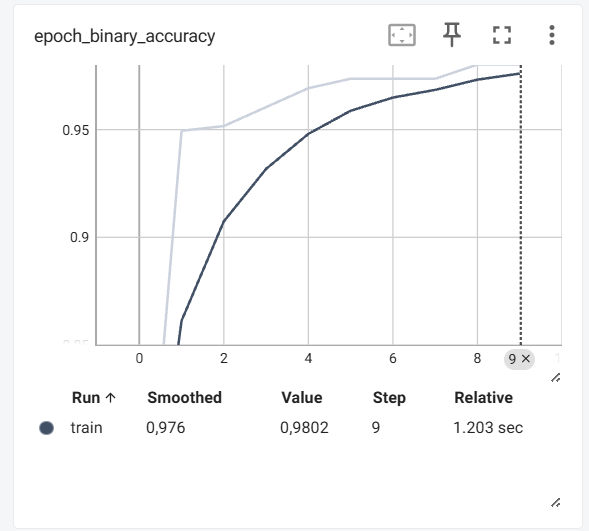 
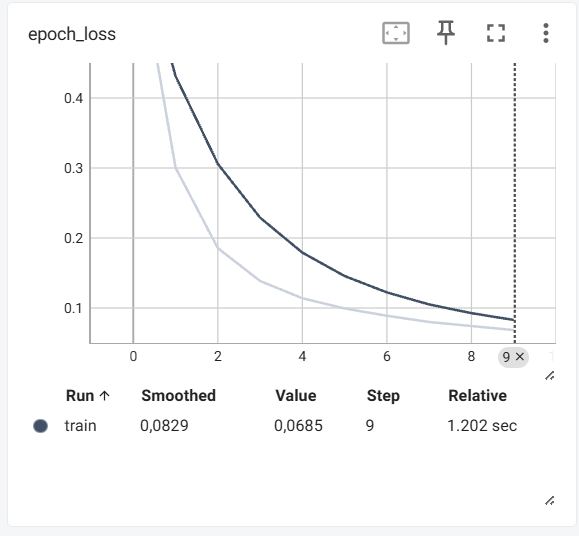

График binary_accuracy показывает, как метрика точности менялась по эпохам. Видно резкое увеличение точности на первых нескольких эпохах, а затем график постепенно выходит на плато, стабилизируясь около значения 0.98. Это говорит о том, что сеть быстро обучилась и достигла высокого уровня точности. График loss показывает уменьшение функции потерь по мере обучения. На первых эпохах потеря сильно падает, а затем снижение замедляется и стабилизируется около 0.06–0.07. Это подтверждает, что сеть успешно минимизировала ошибку классификации и обучение прошло корректно.

Нейронная сеть показала высокую точность и стабильное поведение на протяжении всех эпох. Графики демонстрируют быстрое и стабильное обучение без признаков переобучения, а конфузионная матрица подтверждает, что модель почти идеально справляется с задачей бинарной классификации.

Посмотрим работу нейросети с разными параметрами. Сначала увеличим количество эпох до 30 и батчей до 20:

In [174]:
history = model.fit(
    np.array(X_train),
    np.array(y_train), 
    epochs=30,
    batch_size=20
)

predictions = model.predict(X_test)

binary_predict = (predictions > 0.5).astype(int)

binary_predict


print(confusion_matrix(y_test, binary_predict))


Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9890 - loss: 0.0475
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9912 - loss: 0.0455 
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.9912 - loss: 0.0438
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9934 - loss: 0.0422 
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9934 - loss: 0.0408 
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.9934 - loss: 0.0389
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9934 - loss: 0.0379 
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9934 - loss: 0.0359 
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9934 - loss: 0.0349 
Epoch 10/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9934 - loss: 0.0340
Epoch 11/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9934 - loss

Сначала модель обучалась с меньшим числом эпох (10) и меньшим размером батча (10), при этом точность на тестовом наборе была очень высокой: матрица [[71, 0], [1, 42]] показала отсутствие false positive и минимальное количество ошибок. При увеличении числа эпох до 30 и увеличении batch_size до 20 модель достигла почти идеальной точности на тренировочных данных, доходя до 1.0, однако на тесте появились небольшие ошибки, что выразилось в матрице [[70, 1], [1, 42]]. Это указывает на то, что увеличение числа эпох и размера батча привело к переобучению: модель стала слишком хорошо подстраиваться под тренировочные данные, что чуть ухудшило её способность к обобщению на новых примерах. Меньшее число эпох и меньший батч позволили модели лучше обобщать и давать более стабильный результат на тестовом наборе.

Уменьшим оба параметра до 1:

In [175]:
history = model.fit(
    np.array(X_train),
    np.array(y_train), 
    epochs=1,
    batch_size=1
)

predictions = model.predict(X_test)

binary_predict = (predictions > 0.5).astype(int)

binary_predict


print(confusion_matrix(y_test, binary_predict))


455/455 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.9890 - loss: 0.0350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[[68  3]
 [ 1 42]]


При обучении с параметрами epochs=1 и batch_size=1 модель обновляет веса после каждого отдельного объекта в обучающей выборке. Такой режим делает процесс обучения нестабильным: веса сильно изменяются от одного примера к другому, модель начинает реагировать на единичные случаи и хуже улавливает общие закономерности. Несмотря на то что тренирующая точность стала равна 1, матрица ошибок на тестовых данных показывает ухудшение результата: появилось больше неправильных классификаций по сравнению с предыдущими экспериментами. Это означает, что обучение в один проход при очень маленьком размере батча не даёт модели возможности «усреднить» информацию по данным и приводит к слабой способности обобщать.

Попробуем изменить архитектуру модели и укажем скорость обучения 0.001:

In [176]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=keras.activations.relu),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss = keras.losses.binary_crossentropy,
    metrics=[
        keras.metrics.BinaryAccuracy()
    ]
)


history = model.fit(
    np.array(X_train),
    np.array(y_train), 
    epochs=10,
    batch_size=10
)

predictions = model.predict(X_test)

binary_predict = (predictions > 0.5).astype(int)

binary_predict


print(confusion_matrix(y_test, binary_predict))


Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9033 - loss: 0.2951
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.9560 - loss: 0.1530
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9714 - loss: 0.1156
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9736 - loss: 0.0965
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9780 - loss: 0.0835
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9802 - loss: 0.0745
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9802 - loss: 0.0675
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9824 - loss: 0.0623
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9868 - loss: 0.0576
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9890 - loss: 0.0541
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[69  2]
 [ 1 42]]


После изменения архитектуры сети - уменьшения количества слоёв и использования только одного скрытого слоя, а также указания скорости обучения для оптимизатора Adam - модель стала проще и обучается более предсказуемо. Точность на тренировочных данных постепенно росла и стабилизировалась без резких скачков. При этом результат на тестовом наборе слегка ухудшился по сравнению с исходной более «глубокой» моделью: матрица ошибок показывает увеличение количества неправильных классификаций. Это означает, что модель стала менее выразительной и хуже справляется с поиском сложных закономерностей в данных. Уменьшение структуры делает обучение более устойчивым и снижает риск переобучения, но при этом ограничивает способность сети к обобщению. В этом эксперименте сеть оказалась слишком простой, чтобы достичь максимальной точности на тестовых данных.

Теперь переберем с помощью метода Grid Search с кросс-валидацией оптимальную скорость обучения и архитектуру сети:

In [ ]:
import os
import shutil
from sklearn.model_selection import KFold

log_dir = "logs"

if os.path.exists(log_dir) and os.path.isdir(log_dir):
    shutil.rmtree(log_dir)

def build_model_keras(architecture, lr):
    model = keras.Sequential()

    if architecture == 1:
        model.add(keras.layers.Input(shape=(X_train.shape[1],)))
        model.add(keras.layers.Dense(32, activation='relu'))
        model.add(keras.layers.Dense(1, activation='sigmoid'))

    elif architecture == 2:
        model.add(keras.layers.Input(shape=(X_train.shape[1],)))
        model.add(keras.layers.Dense(64, activation='relu'))
        model.add(keras.layers.Dense(32, activation='relu'))
        model.add(keras.layers.Dense(1, activation='sigmoid'))

    elif architecture == 3:
        model.add(keras.layers.Input(shape=(X_train.shape[1],)))
        model.add(keras.layers.Dense(128, activation='relu'))
        model.add(keras.layers.Dense(64, activation='relu'))
        model.add(keras.layers.Dense(32, activation='sigmoid'))
        model.add(keras.layers.Dense(1, activation='sigmoid'))

    optimizer = keras.optimizers.Adam(learning_rate=lr)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )
    return model

learning_rates = [0.1, 0.01, 0.001]
architectures = [1, 2, 3]
epochs = 20
batch_size = 16

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}  


for arch in architectures:
    for lr in learning_rates:
        fold_accuracies = []

        print(f"\n🔹 Architecture={arch}, learning_rate={lr}")
        print("-----------------------------------------------------")

        X_train_np = np.array(X_train)
        y_train_np = np.array(y_train)

        for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train_np)):
            X_tr, X_val = X_train_np[train_idx], X_train_np[val_idx]
            y_tr, y_val = y_train_np[train_idx], y_train_np[val_idx]

            model = build_model_keras(architecture=arch, lr=lr)

            logdir = os.path.join(f"arch{arch}_lr{lr}_fold{fold}")
            callback = keras.callbacks.TensorBoard(log_dir=logdir)

            model.fit(
                X_tr, y_tr,
                validation_data=(X_val, y_val),
                epochs=epochs,
                batch_size=batch_size,
                #callbacks=[callback],
                verbose=0
            )

            preds = (model.predict(X_val) > 0.5).astype(int)
            acc = accuracy_score(y_val, preds)
            fold_accuracies.append(acc)

            print(f"Fold {fold + 1}: Accuracy = {acc:.4f}")
        results[(arch, lr)] = np.mean(fold_accuracies)
        

best_params = max(results, key=results.get)
best_accuracy = results[best_params]

print("\n========== Лучшие параметры ==========")
print(f"Architecture = {best_params[0]}, Learning rate = {best_params[1]}")
print(f"Final Accuracy (K-fold average): {best_accuracy:.4f}")



🔹 Architecture=1, learning_rate=0.1
-----------------------------------------------------
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Fold 1: Accuracy = 0.9670
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Fold 2: Accuracy = 0.9890
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 3: Accuracy = 0.9890
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold 4: Accuracy = 0.9780
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Fold 5: Accuracy = 0.9890

🔹 Architecture=1, learning_rate=0.01
-----------------------------------------------------
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold 1: Accuracy = 0.9560
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Fold 2: Accuracy = 0.9890
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Fold 3: Accuracy = 0.9890
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Fold 4: Accuracy = 0.9890
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Fold 5: Accuracy = 1.0000

🔹 Architecture=1, learning_rate=0.001
-----------------------------------------------------
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Fold 1: Accuracy = 0.9670
3/3 ━━━━━━━━━━━━━━━━

На основании проведённого обучения можно сделать вывод о наилучших параметрах нейронной сети. Среди всех протестированных комбинаций архитектур и скоростей обучения наилучший результат показала модель с архитектурой 3 и коэффициентом обучения 0.001, обеспечив среднюю точность на кросс-валидации 0.9868.

Эта архитектура включает три полносвязных слоя с 128, 64 и 32 нейронами соответственно, использует функцию активации ReLU в скрытых слоях, сигмоидальную активацию на выходе и слой Dropout с вероятностью отключения 0.3, что помогает избежать переобучения. Низкое значение learning rate позволило модели более стабильно сходиться и достигнуть высокой точности без резких колебаний функции потерь.

Таким образом, оптимальной конфигурацией нейросети для данного датасета является глубокая архитектура с умеренной регуляризацией и малым шагом обучения, обеспечивающая наилучший баланс между точностью и обобщающей способностью модели.

## Сравнительный анализ

Построим графики и таблицу метрик для всех 5-ти методов и нейросети с наилучшими параметрами, чтобы сравнить, какая модель больше подходит для данного датасета.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


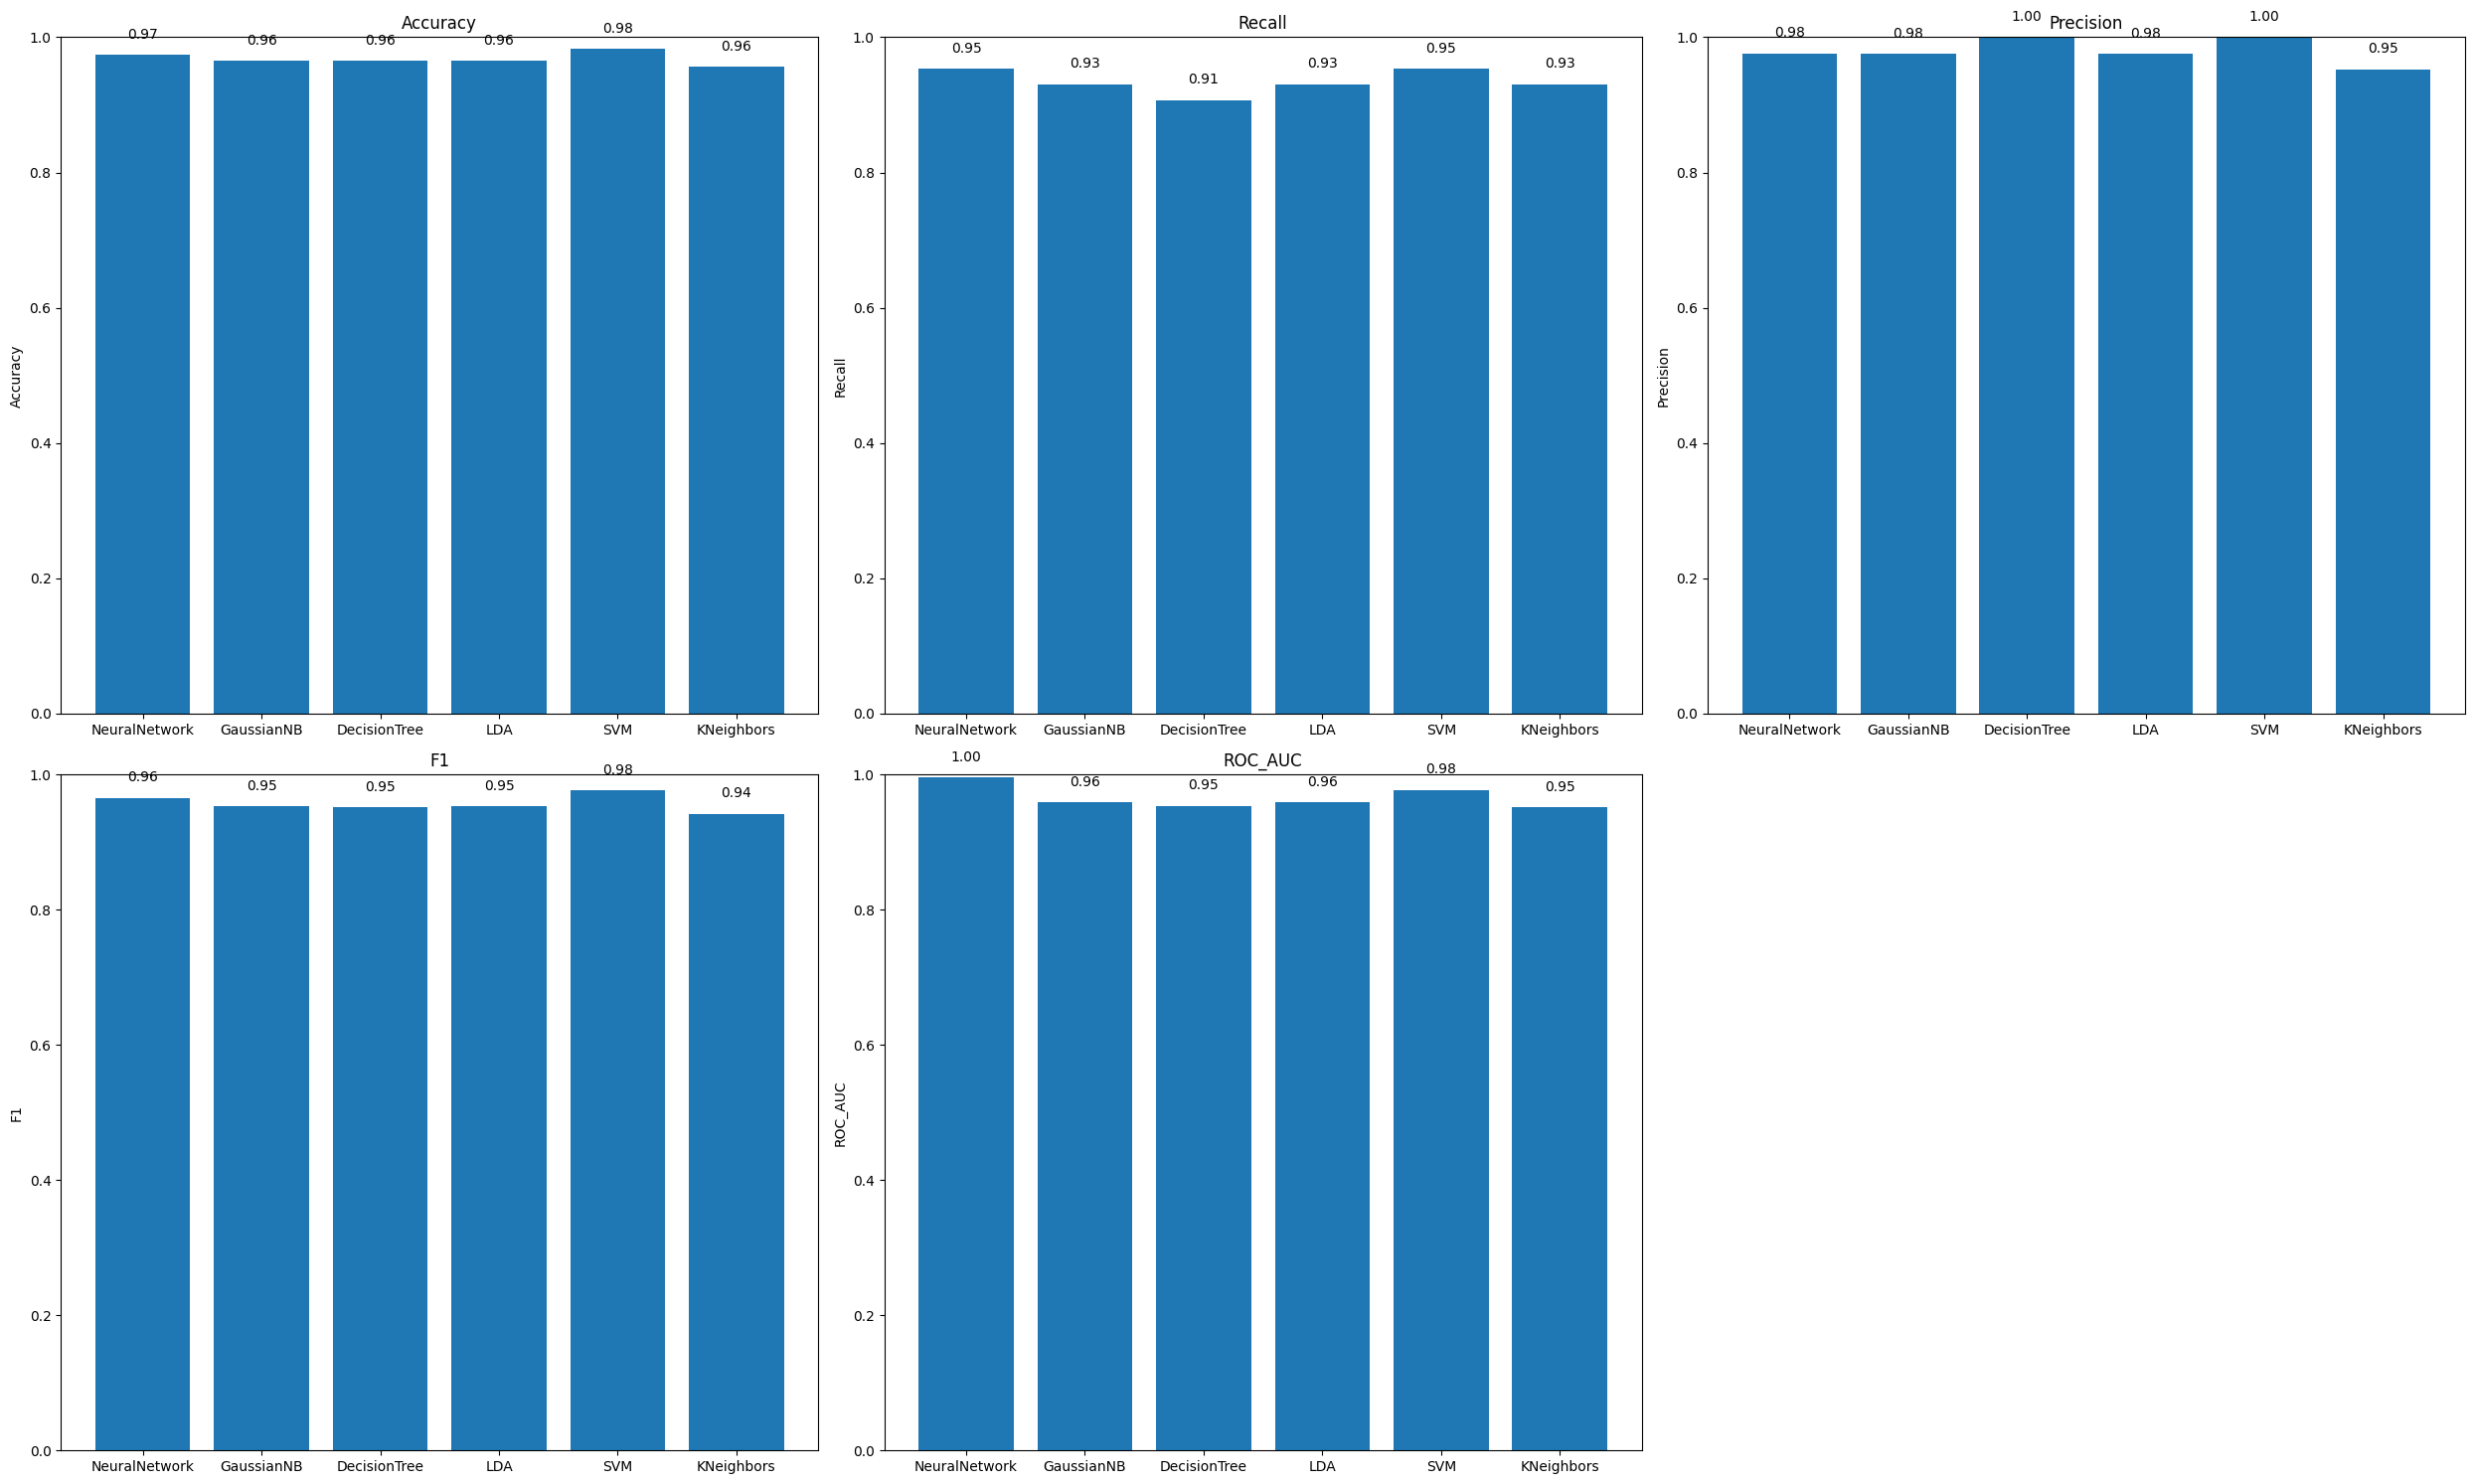


Таблица сравнения метрик для всех моделей:



,Model,Accuracy,Recall,Precision,F1,ROC_AUC
0,NeuralNetwork,0.974,0.953,0.976,0.965,0.995
1,GaussianNB,0.965,0.930,0.976,0.952,0.958
2,DecisionTree,0.965,0.907,1.000,0.951,0.953
3,LDA,0.965,0.930,0.976,0.952,0.958
4,SVM,0.982,0.953,1.000,0.976,0.977
5,KNeighbors,0.956,0.930,0.952,0.941,0.951


In [188]:
metrics_dict = {'Model': [], 'Accuracy': [], 'Recall': [], 'Precision': [], 'F1': [], 'ROC_AUC': []}
best_architecture, best_lr = best_params
best_model = build_model_keras(best_architecture, best_lr)
best_model.fit(np.array(X_train), np.array(y_train), epochs=epochs, batch_size=batch_size, verbose=0)

preds_proba = best_model.predict(X_test)
preds = (preds_proba > 0.5).astype(int)

metrics_dict["Model"].append("NeuralNetwork")
metrics_dict["Accuracy"].append(accuracy_score(y_test, preds))
metrics_dict["Recall"].append(recall_score(y_test, preds))
metrics_dict["Precision"].append(precision_score(y_test, preds))
metrics_dict["F1"].append(f1_score(y_test, preds))
metrics_dict["ROC_AUC"].append(roc_auc_score(y_test, preds_proba))

models = {
    "GaussianNB": GaussianNB(var_smoothing=0),
    "DecisionTree": DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42),
    "LDA": LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'),
    "SVM": SVC(C=1, kernel='rbf', gamma='auto', probability=True, random_state=42),
    "KNeighbors": KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    metrics_dict['Model'].append(name)
    metrics_dict['Accuracy'].append(accuracy)
    metrics_dict['Recall'].append(recall)
    metrics_dict['Precision'].append(precision)
    metrics_dict['F1'].append(f1)
    metrics_dict['ROC_AUC'].append(roc_auc)

import matplotlib.pyplot as plt

metrics_df = pd.DataFrame(metrics_dict)

metric_names = ['Accuracy', 'Recall', 'Precision', 'F1', 'ROC_AUC']

plt.figure(figsize=(25, 15))

for i, metric in enumerate(metric_names, 1):
    plt.subplot(2, 3, i)
    plt.bar(metrics_df['Model'], metrics_df[metric])
    plt.title(metric)
    plt.ylim(0, 1) 
    for j, val in enumerate(metrics_df[metric]):
        plt.text(j, val + 0.02, f'{val:.2f}', ha='center', va='bottom')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

metrics_df_rounded = metrics_df.copy()
metrics_df_rounded[['Accuracy', 'Recall', 'Precision', 'F1', 'ROC_AUC']] = metrics_df_rounded[
    ['Accuracy', 'Recall', 'Precision', 'F1', 'ROC_AUC']
].round(3)

print("\nТаблица сравнения метрик для всех моделей:\n")
display(metrics_df_rounded)

На основе таблицы и графиков метрик можно сделать следующий сравнительный анализ моделей.

Нейронная сеть показала сбалансированные и высокие результаты по всем показателям: точность составила 0.974, полнота - 0.953, точность предсказания - 0.976, а F1-мера - 0.965. Особенно выделяется значение ROC_AUC=0.995, что говорит о практически идеальной способности модели различать классы и уверенно работать на разных порогах классификации.

Метод опорных векторов (SVM) показал самые высокие показатели точности (0.982) и F1-меры (0.976), а также максимальную точность предсказания (1.000). Однако значение ROC_AUC (0.977) немного ниже, чем у нейронной сети, что указывает на чуть меньшую устойчивость при изменении порогов классификации.

Остальные классические алгоритмы - LDA, GaussianNB и DecisionTree - продемонстрировали близкие результаты (Accuracy и F1 около 0.95–0.96). Они обладают хорошей точностью и высокой интерпретируемостью, однако уступают нейронной сети и SVM в обобщающей способности и устойчивости классификации (ROC_AUC не превышает 0.96).
Метод ближайших соседей (KNeighbors) отстаёт сильнее - его F1-мера составляет 0.941, а ROC_AUC - 0.951, что указывает на менее стабильное разделение классов.

Наилучшие результаты по совокупности метрик показывают нейронная сеть и SVM, при этом нейросетевая модель демонстрирует более высокий ROC_AUC, что говорит о лучшей способности различать классы и устойчивости при изменении порогов. Таким образом, нейронная сеть является оптимальным подходом для данного датасета, а SVM можно рассматривать как надёжную альтернативу с аналогичной точностью, но чуть меньшей обобщающей способностью.

## Заключение 

В заключение можно отметить, что в проделанной работе была успешно реализована многосторонняя система классификации: от подготовки данных до обучения и оценки различных алгоритмов - от классических моделей до нейросети. Управление гиперпараметрами с помощью кросс-валидации позволило выявить оптимальную конфигурацию нейросети (архитектура 3 с learning rate=0.001), что подтверждается полученными метриками. Итоговое сравнение моделей показало, что нейросеть и метод опорных векторов дают наилучшие результаты, причём нейросеть обеспечивает чуть лучшую обобщающую способность (наиболее высокое значение ROC_AUC). Это свидетельствует о том, что выбранный нами подход способен корректно решать задачу классификации на данном датасете и обладает высокой пригодностью для практического применения. При этом классические алгоритмы остаются полезными как быстрые и интерпретируемые альтернативы, особенно если ресурсы ограничены или требуется объяснимость модели.